# Dall' analogico al digitale - S08

**Informazioni generali:** Studio di operatori logici NOT, NAND e XOR

Dettagli del setup:
* BS170P
* CD4011BE
* AD2 per l'acquisizione dati
* LED vari e pulsanti per controllare il corretto comportamento delle porte logiche

## Task 1 - Caratteristiche del BS107P

Dal Datasheet il valore di $V_{thr} = 1V-3V$ 

La piedinatura è la seguente












0


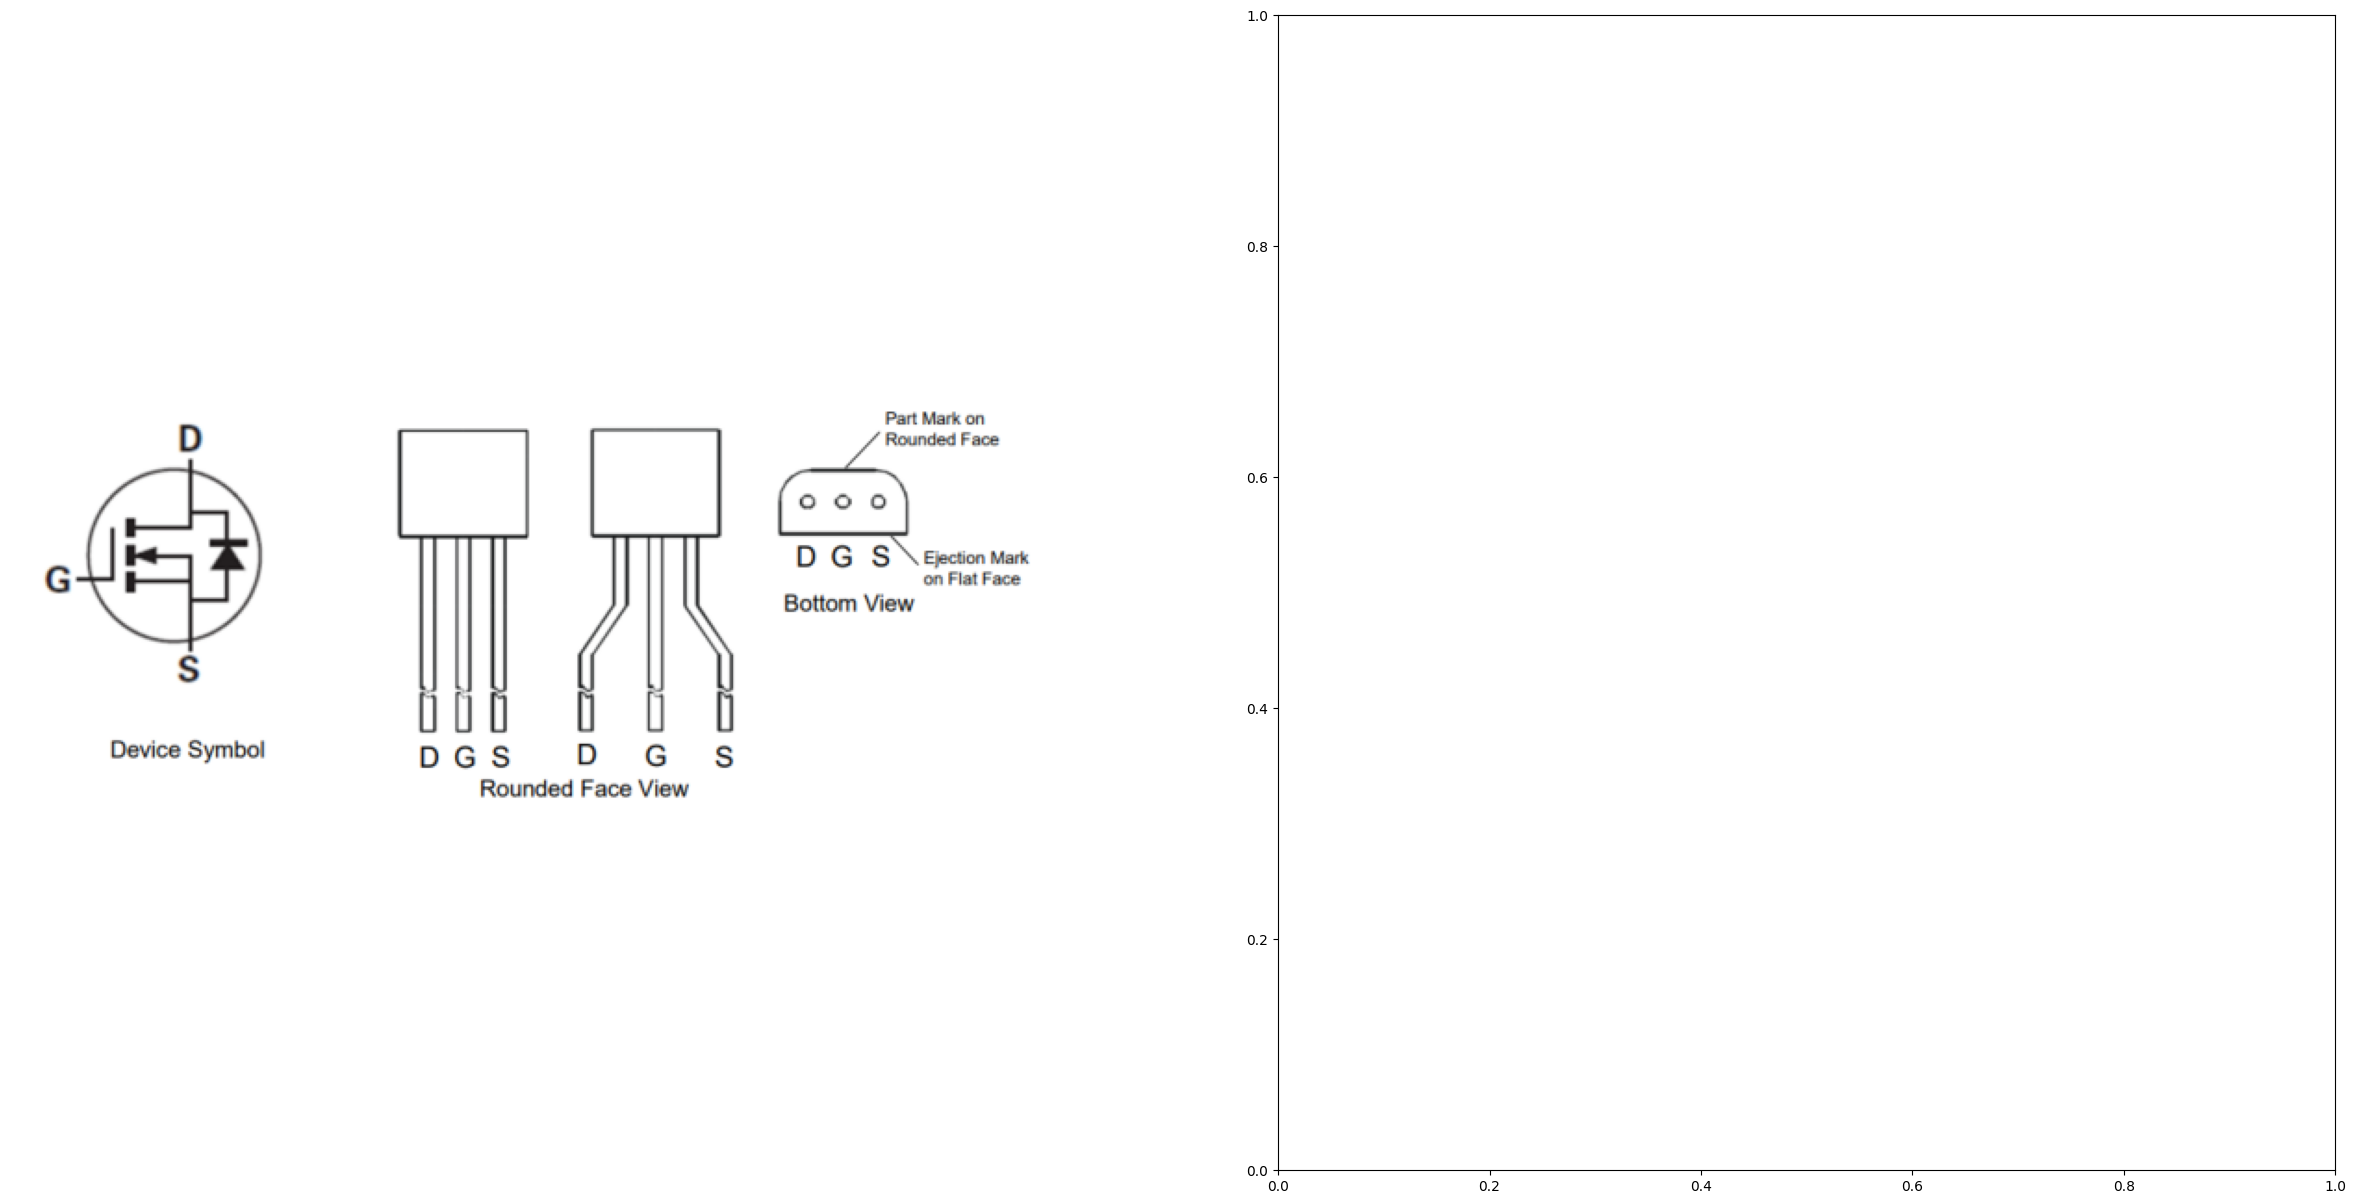

In [8]:
import fitz  # PyMuPDF
from PIL import Image
import matplotlib.pyplot as plt

# Function to convert a PDF page to an image
def pdf_page_to_image(pdf_path, page_num=0):
    pdf_document = fitz.open(pdf_path)
    page = pdf_document.load_page(page_num)  # Load the specified page
    pix = page.get_pixmap()  # Convert page to image
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    return img

# Function to display two PDF pages side by side
def display_pdfs_side_by_side(rows, cols, pdfList):
    # Convert all PDF pages to images
    imgList = []
    for pdf in pdfList:
        imgList.append(pdf_page_to_image(pdf))

    # Create a new figure for nxm subplots (n row, m columns)
    if cols == 1 and rows == 1:
        #img = pdf_page_to_image(pdf_path)
        plt.imshow(imgList[0])
        plt.axis('off')
        plt.show()
        return
    
    fig, axes = plt.subplots(rows, cols, figsize=(30, 15), squeeze=False)
    
    # Display the various images

    for i in range(rows):
        print(i)
        if cols == 1:
            try:
                axes[i].imshow(imgList[i])
                axes[i].axis('off')
            except:
                pass
        else:
            for j in range(cols):
                try:
                    axes[i][j].imshow(imgList[i*cols+j])
                    axes[i][j].axis('off')
                except:
                    pass
    plt.show()


# Provide the paths to your two PDFs
pdfList = ['Media/BS107P.png']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)


## Task 2 - Progettazione di massima del circuito

Il circuito che utilizzeremo è il seguente, l' obbiettivo è quello di osservare il comportamento di una porta NOT

misura di $R1 = 994.6\pm3.9 \Omega$

Alimentando a $V_{DD} = 5V$ ci aspettiamo che $Q_1$ conduca molto e cortocircuiti con l' uscita a terra, quindi la corrente $I_D$ è data solo dalla caduta di potenziale lungo $R1$, $I_D = \mathrm{\frac{5V}{1k\Omega}\sim5mA}$ 
 

 Si sono trovati i punti $V_{OH}, V_{OL}, V_{IH}$ e $V_{IL}$ ottenendo una derivata discreta e cercando punti con $\delta V_o/\delta V_i \in[-1-\epsilon , -1+\epsilon]$ aumentando iterativamente $\epsilon$ fino a trovare due soli punti.
 



0


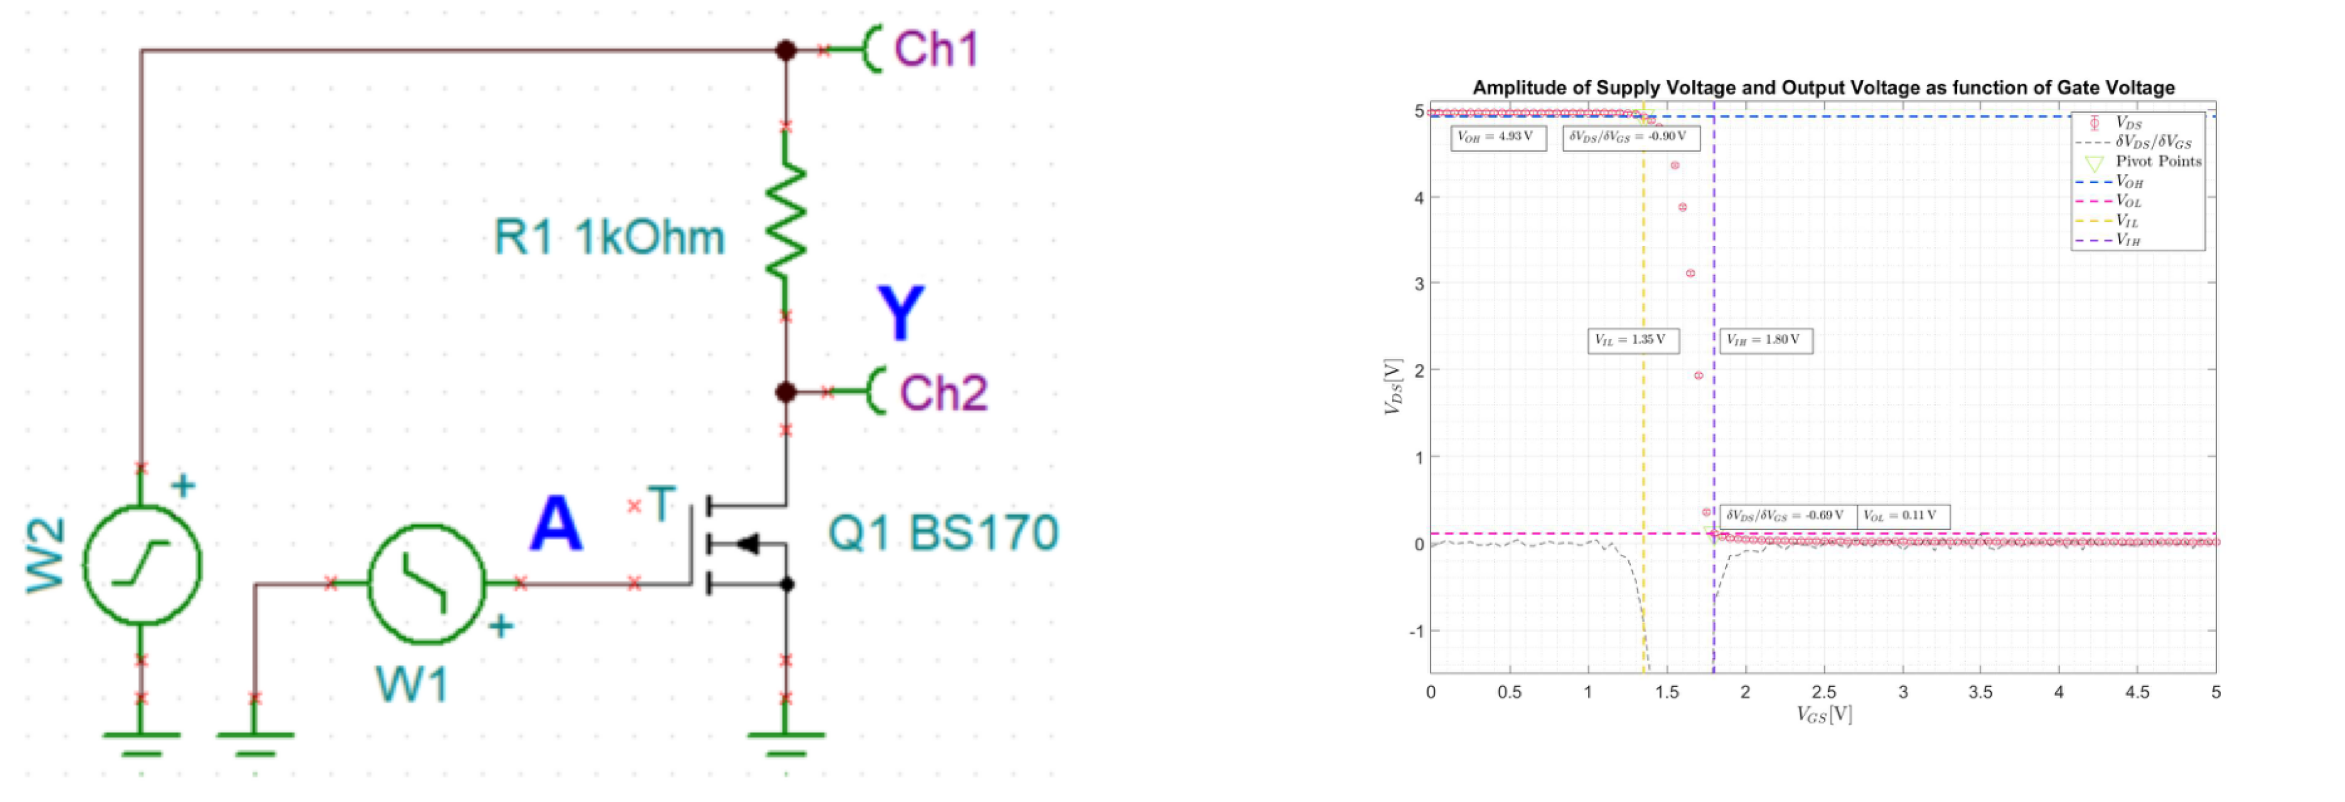

In [9]:
pdfList = ['Media/porta_NOT.png', 'Media/Dynamic.pdf']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)

## Task 3 - Curva caratteristica di $I_D (V_D)$

Vogliamo misurare $I_D$ in funzione di $V_D(V_{GS})$, spazziamo quindi sul valore di $V_{GS}$ da 1.2V a 2.0V, tramite intervalli di 0.1V, ripetiamo la misura tre volte per ogni votaggio per limitare il rumore e usiamo media e varianza per ricavare l errore di $I_D$ sui singoli voltaggi.

Il risultato è il seguente, notiamo che non rispetta l andamento $I_D \propto (V_{GS} - V_P - V_{DS}/2 ) V_{DS}$ 

0


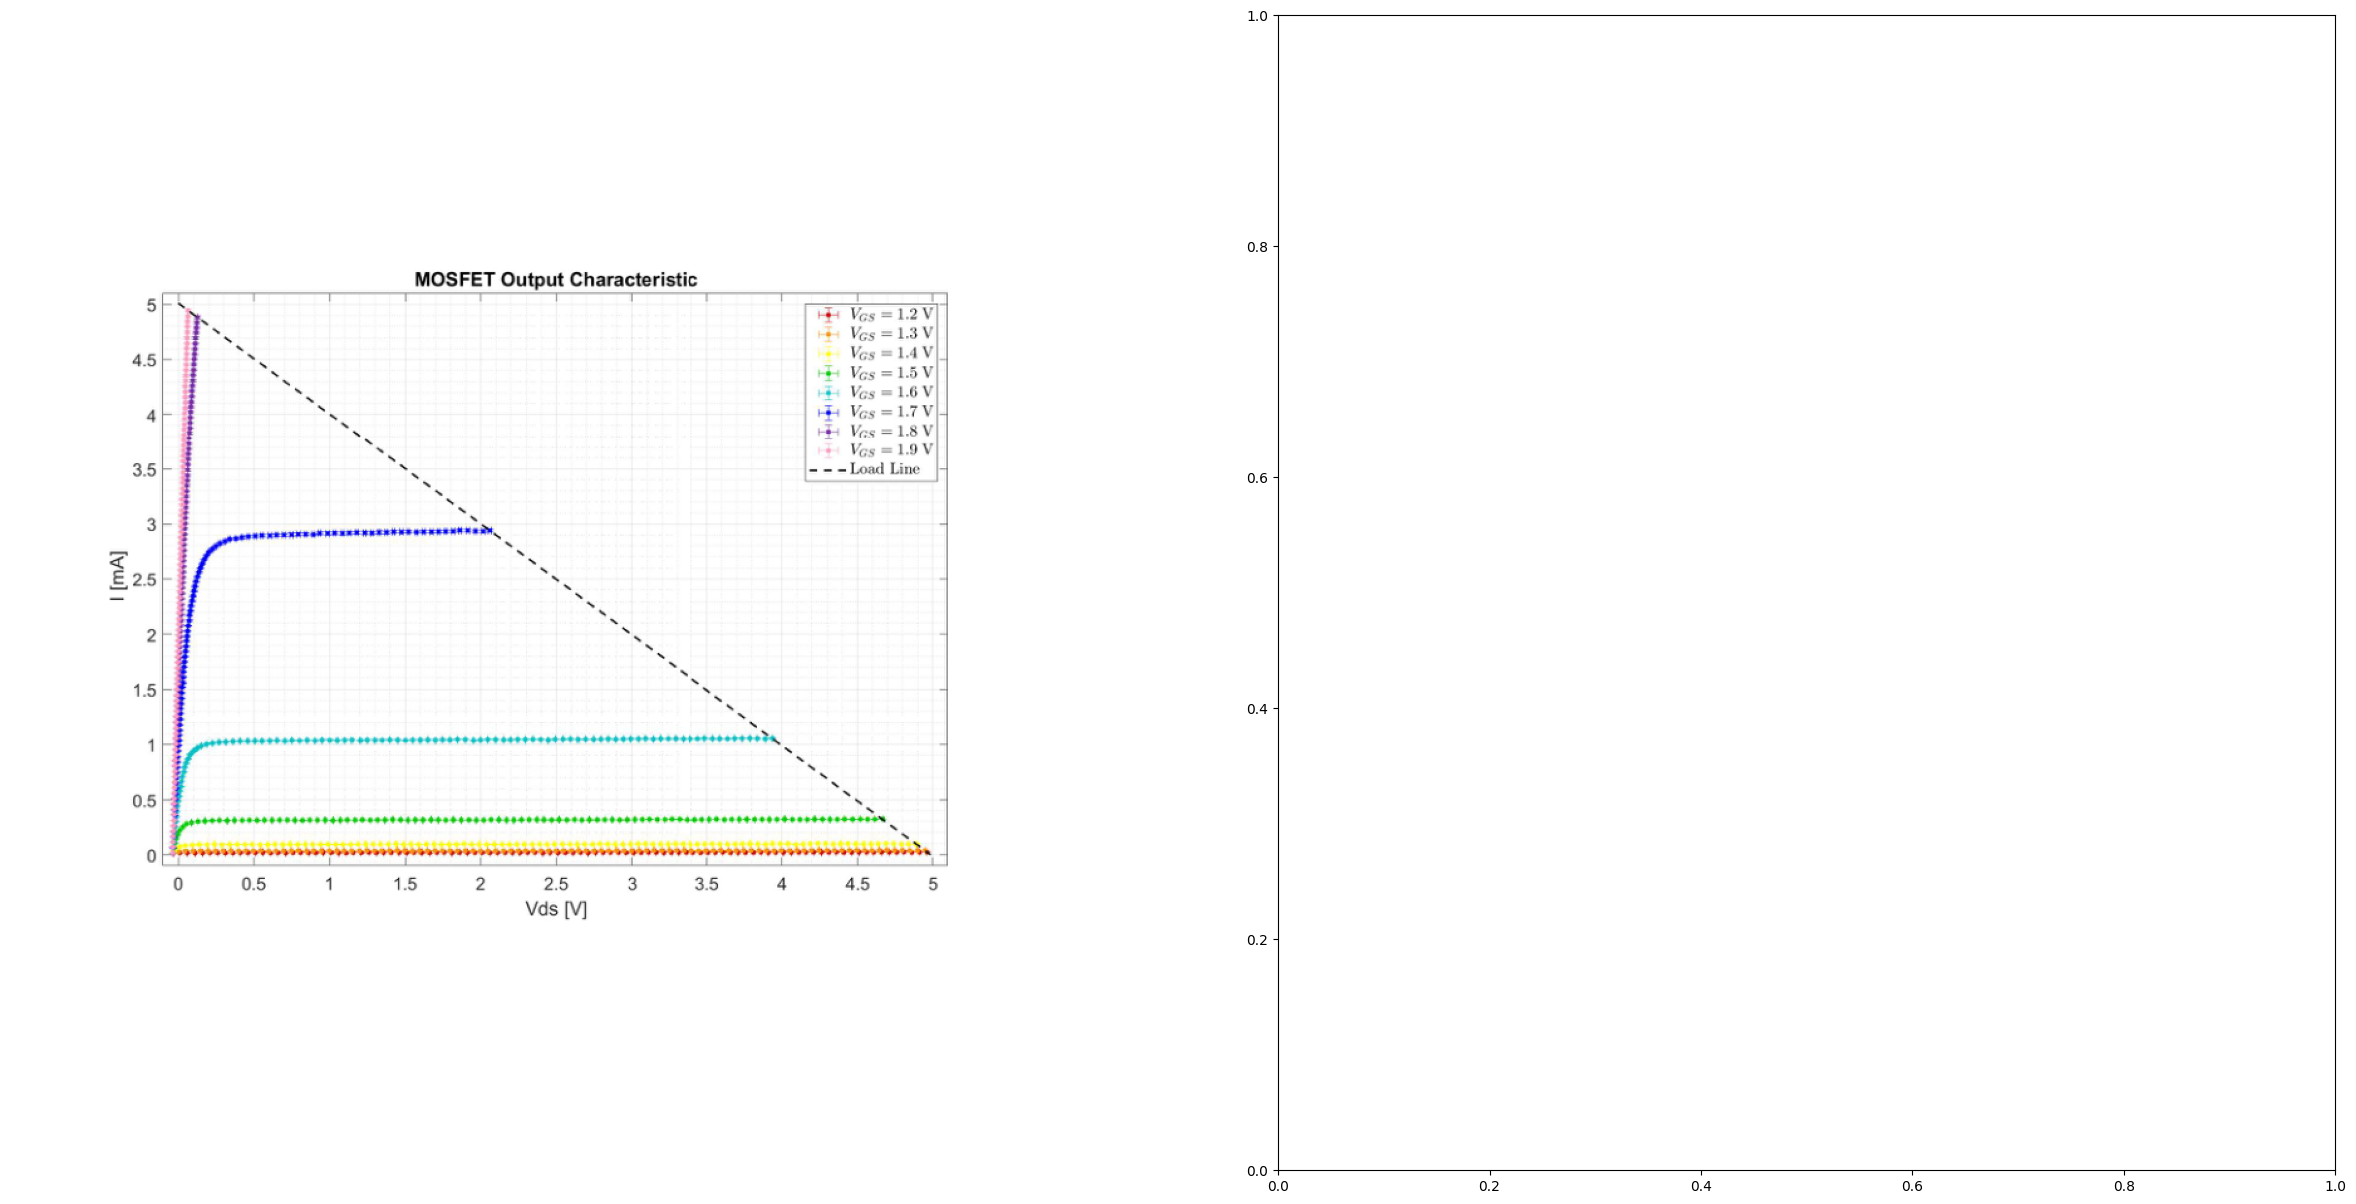

In [10]:
pdfList = ['Media/PortaNOT.pdf']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)

## Task 4 e 5 - Datasheet CD4011BE e Porta universale NAND

In questa sezione utilizzeremo l' integrato CD4011BE, il suo voltaggio di alimentazione va da 3V a 18V, compatibile con le specifiche di ad2 riducendoci all intervallo 0V-5V
Di seguito la sua piedinatura e il circuito utilizzato.

 misura di $R1 = 9.973\pm0.039\mathrm{k\Omega}$

0


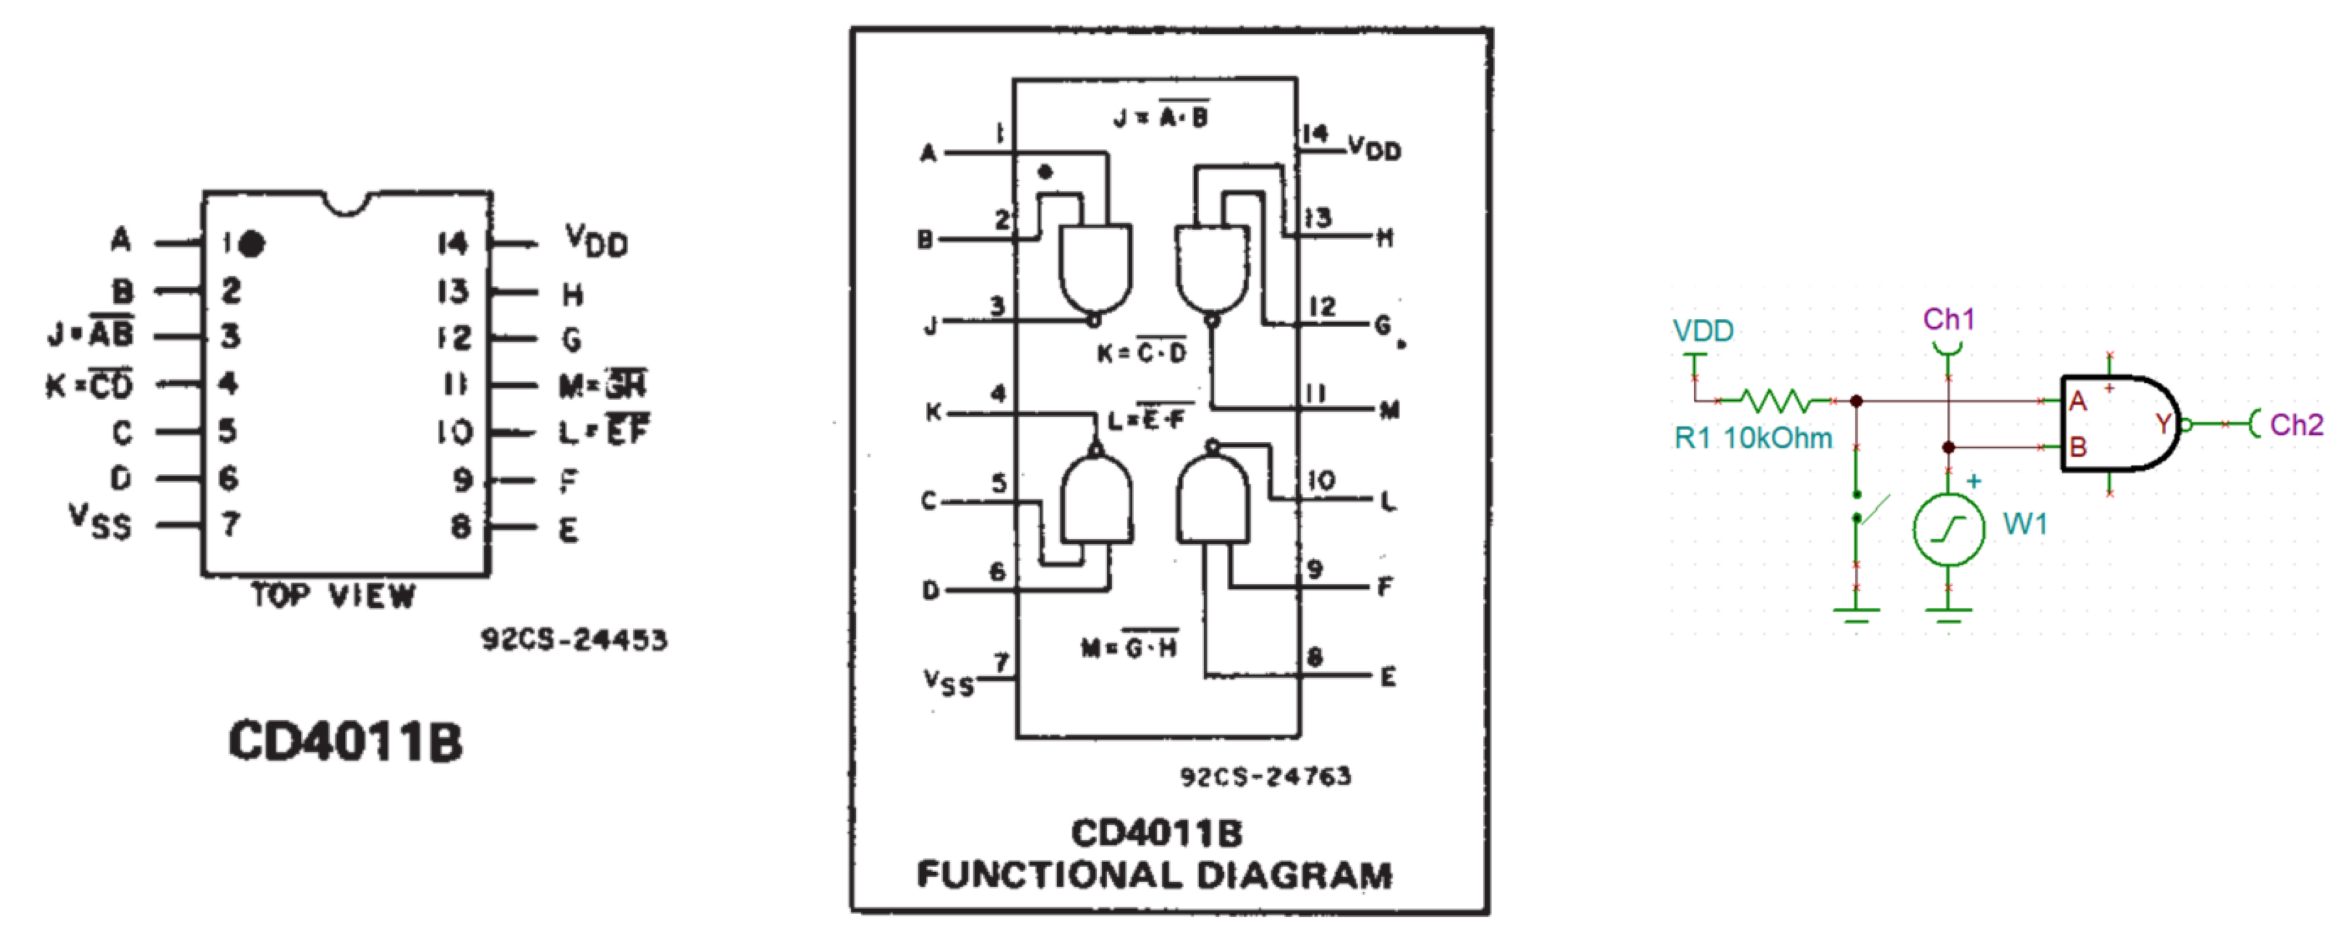

In [11]:
pdfList= ['Media/piedini_belli.png', 'Media/piedini_brutti.png', 'Media/porta_NAND.png']
rows = 1
cols = 3
display_pdfs_side_by_side(rows, cols, pdfList)


Per verificare il comportamento della porta NAND abbiamo costruito un circuito equivalente a quello richiesto, sostituendo l interruttore con un pulsante e mandando in input un onda quadra di ampiezza 5V.
Il pulsante premuto corrisponde all interruttore chiuso, quello non premuto al circuito aperto.
Si osserva un comportamento compatibile con la tabella di verità dell operatore logico NAND, infatti quando il pulsante è premuto viene invertito il segno dell' onda quadra, quando non è premuto la forma d onda rimane invariata.


## Task 6.1 - Tabelle di verità dei circuiti in figura

0


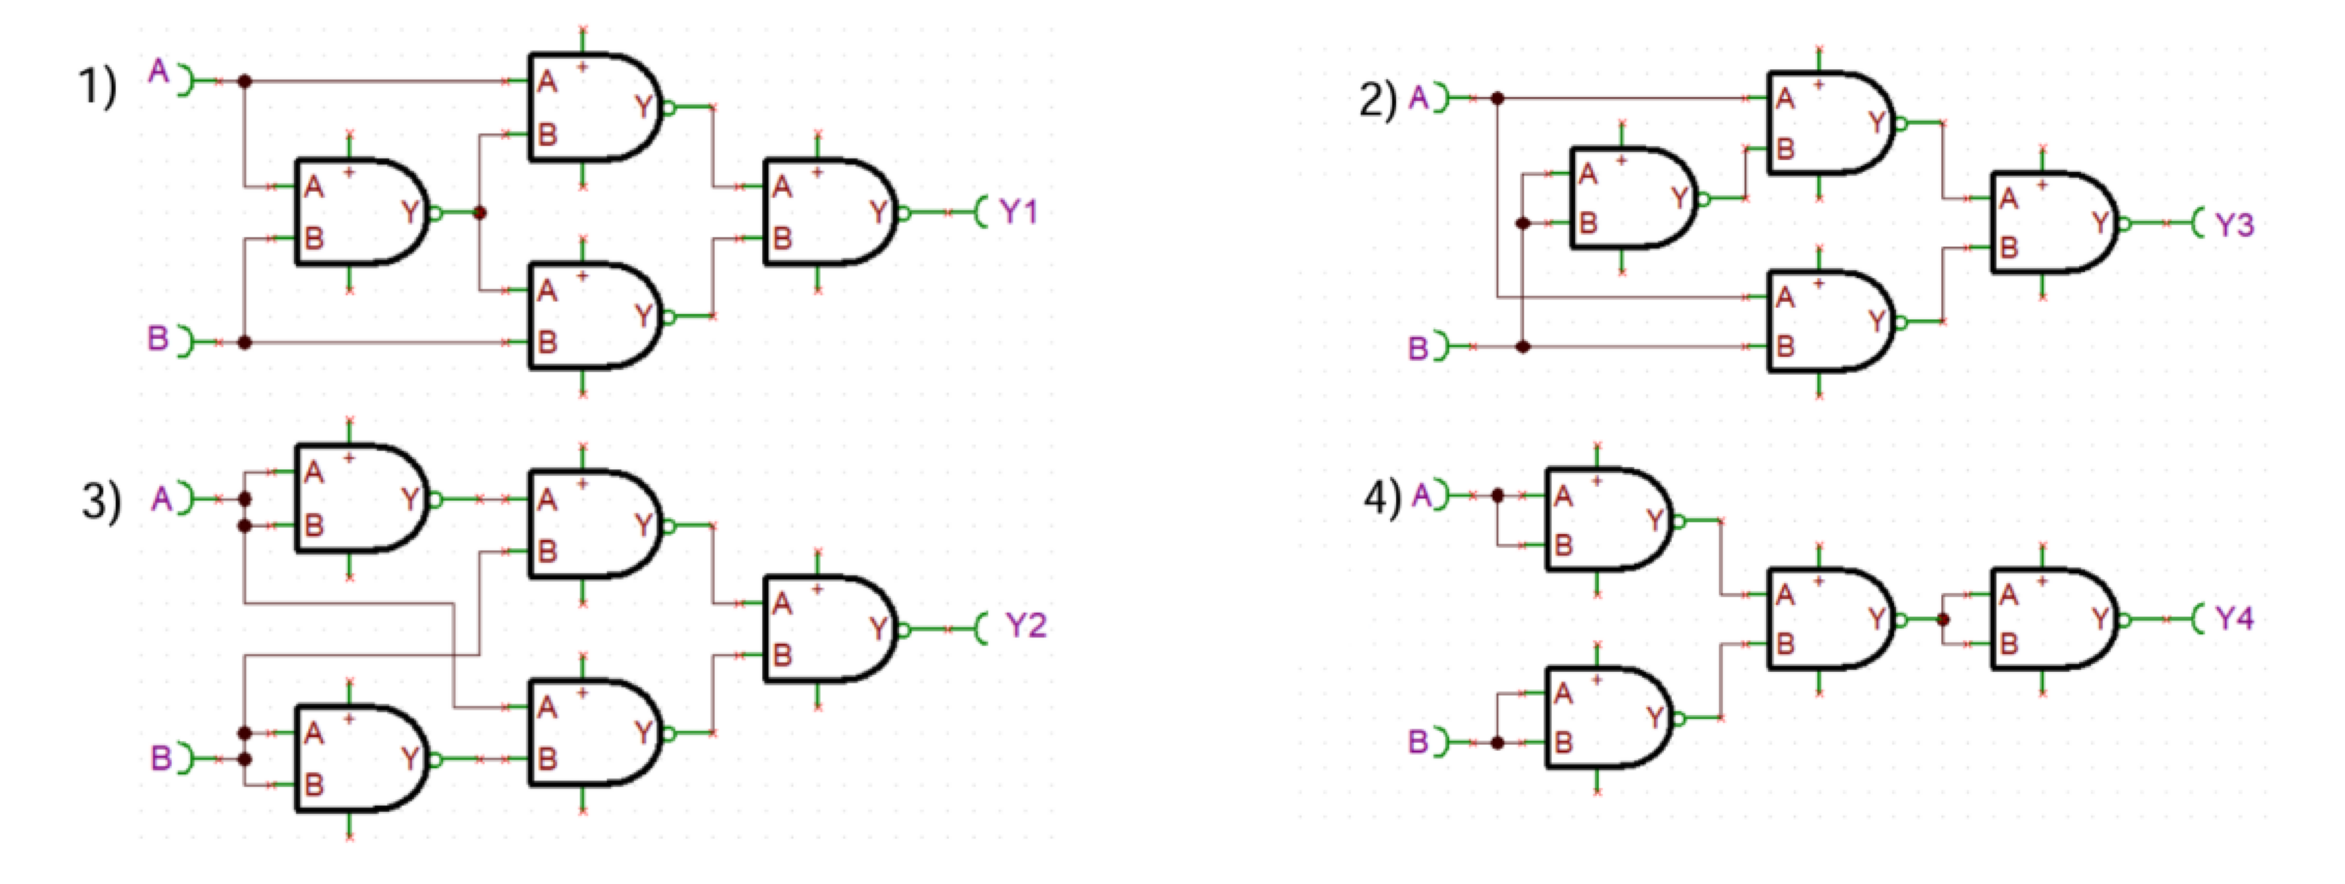

In [12]:

pdfList= ['Media/circ_1-3.png', 'Media/circ_2-4.png']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)


1)   $\overline{ \overline{A \overline{AB} } \overline{B \overline{AB}}} = \overline{\overline{A\overline{AB}}} + \overline{\overline{\overline{AB}B}} = 
A\overline{AB} + B\overline{AB} = \overline{AB}(A + B) = (\overline{A} + \overline{B})(A + B) = A\overline{A} + A\overline{B} + \overline{A}B + B\overline{B} = \overline{A}B + A\overline{B} = A \mathop{\bigoplus} B $

2)   $\overline{ \overline{A\overline{B}} \, \overline{AB} } = \overline{\overline{A\overline{B}}} + \overline{\overline{AB}} = A\overline{B} + AB =
A ( B + \overline{B} ) = A$

3)   $\overline{ \overline{ \overline{A}B } \, \overline{A\overline{B}} } = \overline{\overline{\overline{A}B}} + \overline{\overline{A\overline{B}}} = 
\overline{A}B + A\overline{B} = A \mathop{\bigoplus} B$

4)   $\overline{\overline{\overline{A}\,\overline{B}}} = \overline{A}\,\overline{B} = \overline{A + B}$

## Task 6.2 - Porta XOR 

Per questa sezione scegliamo il circuito 2), che abbiamo dimostrato essere uno XOR. 

Per verificare la porta XOR abbiamo aggiunto un led al circuito in modo da utilizzarlo come indicatore del funzionamento nel seguente modo:
 
I due pulsanti forniscono input '1' e '0' nei punti 'A' e 'B' quando sono e non sono premuti rispettivamente, con input '1'= 5V, input '0' = 0V.

Osserviamo che il led posizionato in 'Y1' si accende solo se uno solo dei due pulsanti viene premuto, rispettando il funzionamento atteso.





0


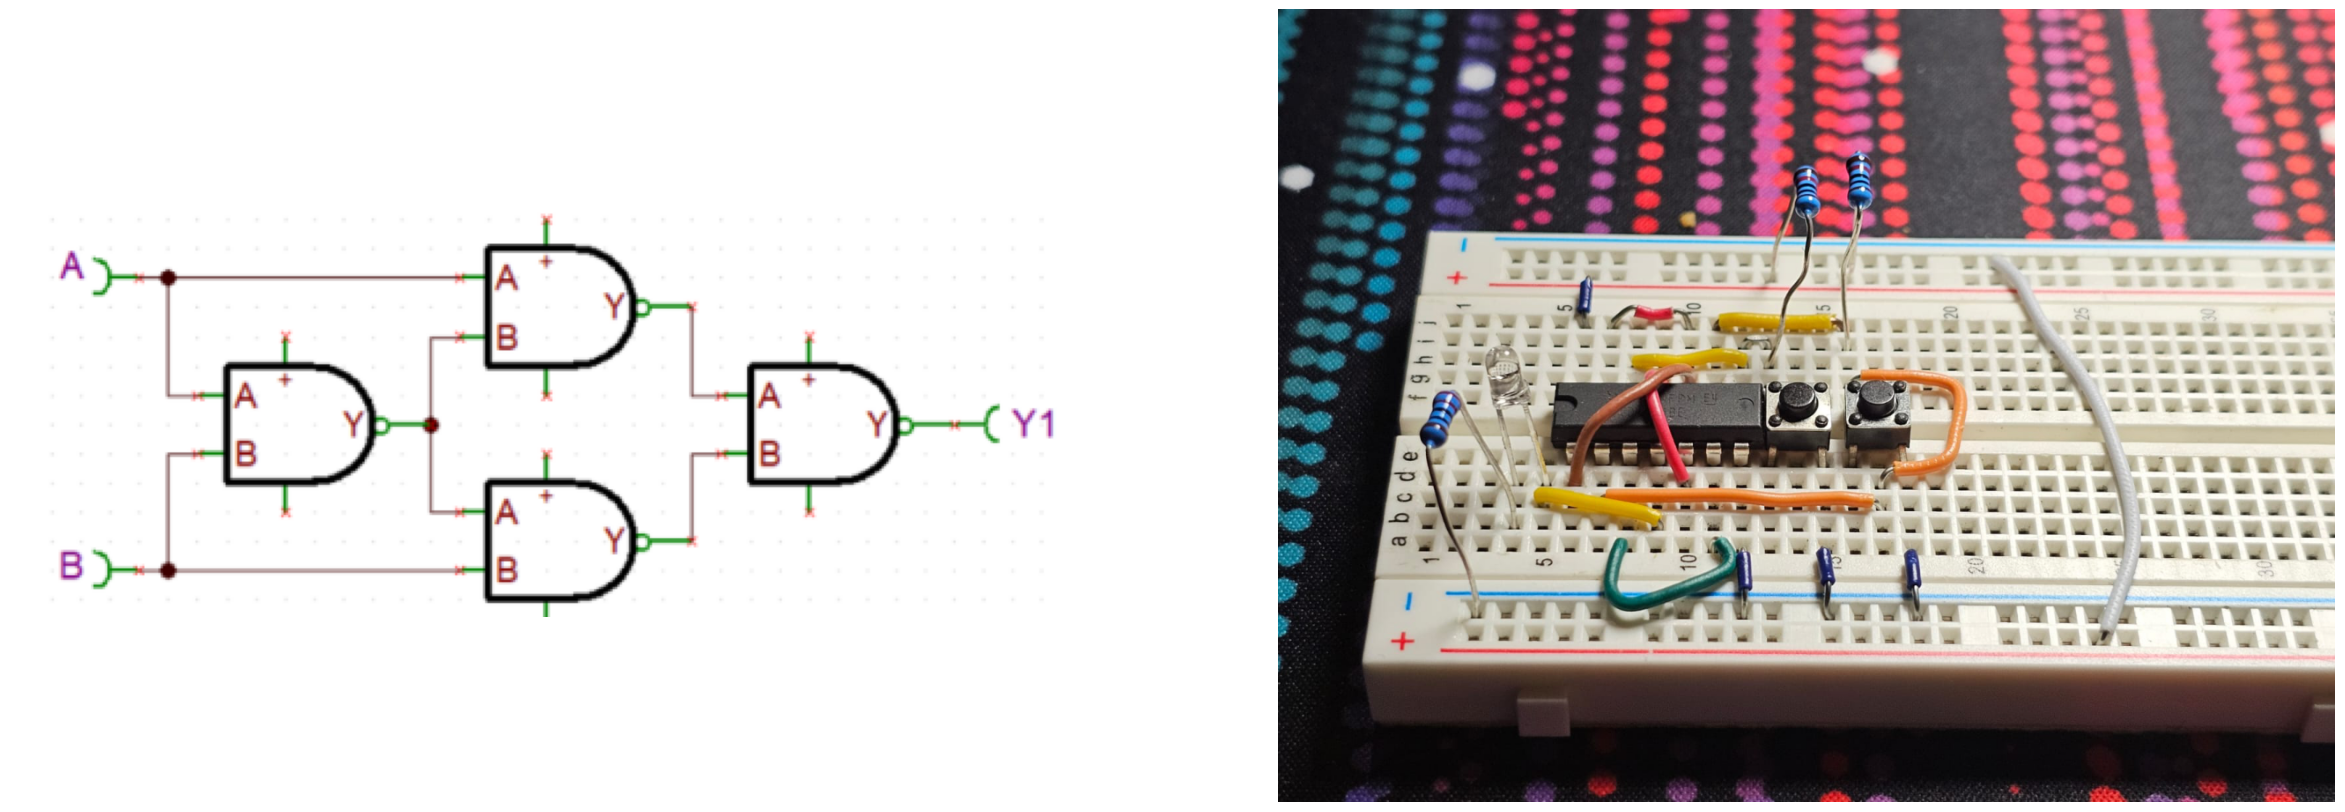

In [13]:
pdfList= ['Media/circuitoXOR.png', 'Media/foto_portaXOR.jpeg']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)

## Task 7 - Circuito Bistabile

0


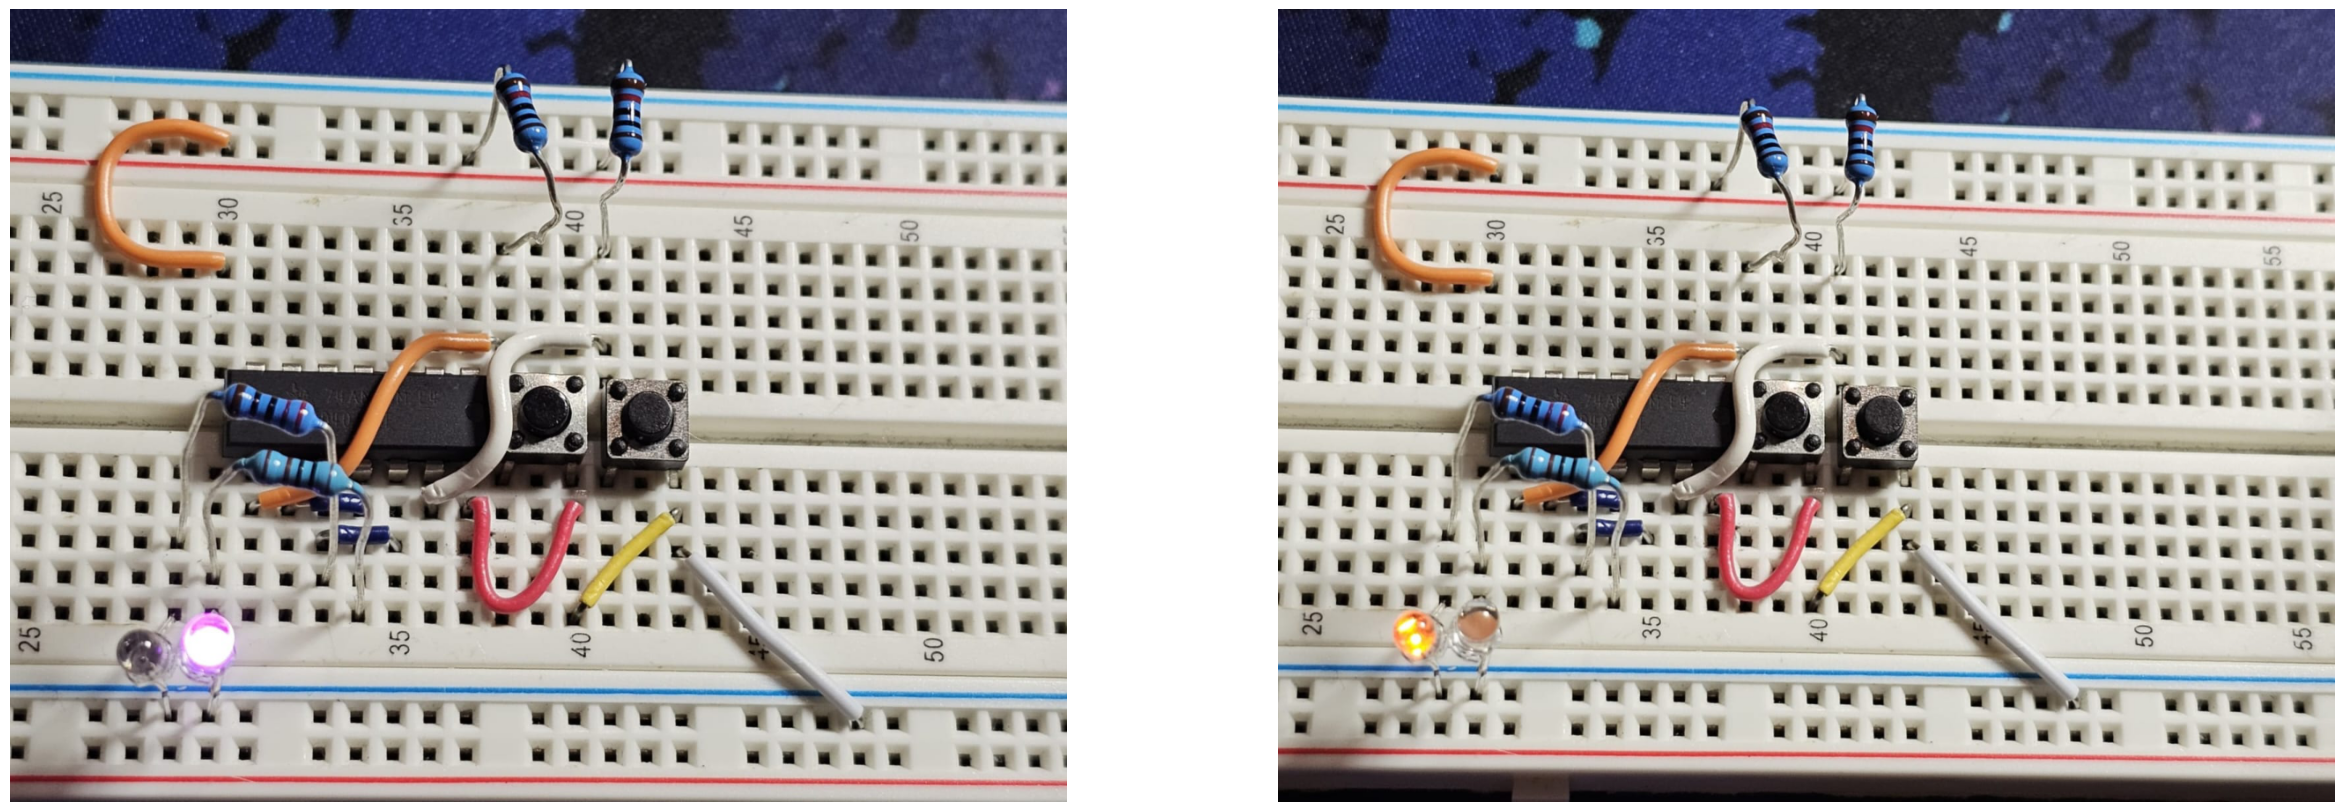

In [14]:
pdfList= ['Media/bistabile_rosa.jpeg', 'Media/bistabile_arancione.jpeg']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)

Si assembla successivamente un latch SR.
Questo è un circuito bistabile con ingressi $ \overline{Set} $ e $ \overline{Reset} $, fintanto che questi sono entrambi alti si hanno le uscite $ Q $ e $ \overline{Q} $ fisse all'ultimo stato memorizzato, questo stato può poi essere abbassato( tramite Reset) o alzato( attraverso Set).
In caso siano entrambi gli ingressi eccitati si ottengono ambo le uscite alte, situazione che manca una definizione univoca.